In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

CSI_RESPROBL  CSI_REESTCOGN  CSI_APOYOSOC  CSI_EVITPROBL  CSI_PENSDESID  \
0            17              5             0              7              5   
1            13             11             3              6             11   
2            20             20            20             11              8   
3            12              1             0              4              6   
4             8              9            17              4             14   

   CSI_RETISOC  CSI_AUTOCRIT  ANSIEDADRASGO  SCL90_IDEA_PARAN  \
0           13             2             20                 0   
1           17            11             17                 1   
2            3             0             20                 1   
3            3             1             18                 0   
4            2             6             27                17   

   CAPE_POSIT_FREC  TRAUMA_FRECUENCIA  SPQ_TOTAL_ESQUIZOT  
0               24                  4                   0  
1               22                  9                   0  
2               30                 12                   1  
3               20                  4                   0  
4               35                 17                   2

In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 95% de los datos para entrenamiento y un 5% de los datos para validación
valid_idx  =  range ( len ( df ) - 14 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_RETISOC', 'CSI_AUTOCRIT', 'CSI_RESPROBL', 'CSI_REESTCOGN', 'CAPE_POSIT_FREC', 'CSI_EVITPROBL', 'ANSIEDADRASGO', 'CSI_APOYOSOC', 'SCL90_IDEA_PARAN', 'CSI_PENSDESID', 'TRAUMA_FRECUENCIA']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.202584 -0.190096 -1.061789 -0.772423 ... -0.939726 -0.31388  -0.853811 -0.073233]
 [-0.414518 -1.256199 -0.467537 -0.211161 ...  0.099321 -0.898642 -0.853811 -1.18502 ]
 [ 0.221284  2.119795  0.522884  0.350101 ... -0.247028  0.465803  1.322883 -0.35118 ]
 [ 0.221284 -0.36778  -1.259873 -0.585335 ... -1.459249 -0.118959 -0.686373  1.038553]
 [ 0.00935   0.52064  -1.061789 -0.772423 ... -0.766552  0.660724  0.485693 -0.536478]]
[0 0 1 2 1]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(10)

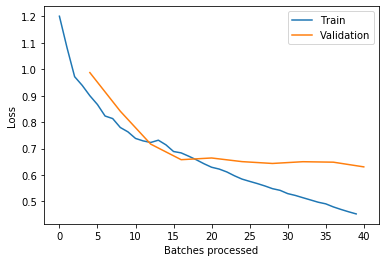

In [10]:
learn.recorder.plot_losses()
learn.show_results()